In [1]:
import pandas as pd
import urllib.request
import re

data = pd.read_csv('./data/split/before_down_BCH0.csv', error_bad_lines=False)
#data = data.append(pd.read_csv('../../news/scraping_result/kr/2017_up1/2017_up1_(KR)Tokenpost.csv', error_bad_lines=False))


In [2]:
data = data.drop('Unnamed: 0',axis = 1)

In [3]:
data

,crypto,gubun,datetime,username,retweets,favorites,hashtags,text
0,BCH,down,2017-08-04 00:00:07,eleaks_reina,0,0,NaN,Coinbase got hammered for rejecting Bitcoin Ca...
1,BCH,down,2017-08-04 00:00:09,ravikaash,0,0,NaN,Admiral Markets Launches Trading on New Crypto...
2,BCH,down,2017-08-04 00:00:11,showmethe_btc,0,1,#Blockchain,Bitcoin Cash Price Poised to Plummet Once Netw...
3,BCH,down,2017-08-04 00:00:18,coinstats,0,0,#BitcoinCash #BCH,BitcoinCash - BCH Price: $364.05 Change in 1h:...
4,BCH,down,2017-08-04 00:00:20,hub_networks,0,0,#Bitcoin #Bitcoin,Bitcoin cash may be a house of cards that come...
...,...,...,...,...,...,...,...,...
288,BCH,down,2017-08-04 00:58:32,athrun,1,0,#BitcoinCash,what a good news! getting free money is a good...
289,BCH,down,2017-08-04 00:58:36,AltCoinCalendar,0,0,NaN,How to Claim Your Bitcoin Cash and Sell it for...
290,BCH,down,2017-08-04 00:58:38,askari2017,0,0,#steemit #aceh #indonesia,Bitcoin Cash drops by 38% while Bitcoin remain...
291,BCH,down,2017-08-04 00:59:16,SportsbookBTC,0,0,#CryptoTrading,#CryptoTrading Coinbase to support Bitcoin Cas...


In [4]:
pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'

data['text'] = data['text'].apply(lambda x : re.sub(pattern=pattern, repl='', string=x ))
# text = re.sub(pattern=pattern, repl='', string=text)

In [5]:
text = data[['text']]
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("#"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [6]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [7]:
text['text']

0      [coinbase, got, hammered, for, rejecting, bitc...
1      [admiral, markets, launches, trading, on, new,...
2      [bitcoin, cash, price, poised, to, plummet, on...
3      [bitcoincash, bch, price, :, $, 364.05, change...
4      [bitcoin, cash, may, be, a, house, of, cards, ...
                             ...                        
288    [what, a, good, news, !, getting, free, money,...
289    [how, to, claim, your, bitcoin, cash, and, sel...
290    [bitcoin, cash, drops, by, 38, %, while, bitco...
291    [cryptotrading, coinbase, to, support, bitcoin...
292    [cryptotrading, coinbase, to, support, bitcoin...
Name: text, Length: 293, dtype: object

In [8]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
import csv
stopword_list =[]
f = open('../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [12]:
text['text']

0      [got, hammered, rejecting, bitcoin, cash, ,, s...
1      [admiral, markets, launches, trading, new, cry...
2      [bitcoin, cash, price, poised, plummet, networ...
3      [bitcoincash, bch, price, :, $, change, :, %, ...
4      [bitcoin, cash, house, cards, come, bitcoin, h...
                             ...                        
288    [good, news, !, getting, free, money, good, wa...
289    [claim, bitcoin, cash, sell, bitcoin, –, compl...
290    [bitcoin, cash, drops, %, bitcoin, remains, st...
291    [cryptotrading, support, bitcoin, cash, januar...
292    [cryptotrading, support, bitcoin, cash, januar...
Name: text, Length: 293, dtype: object

In [13]:
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [18]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [19]:
article_contents = tokenized_doc.values.tolist()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [21]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [22]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [23]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [24]:
word2id = defaultdict(lambda: 0)

In [25]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [26]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [27]:
len(tf_idf_result)

536

In [28]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

536


In [29]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [30]:
sentences = article_contents

In [31]:
from gensim.models import Word2Vec

In [32]:
model = Word2Vec(sentences, min_count=1)

In [33]:
len(model.wv.vocab)

536

In [34]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [35]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [36]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [37]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [38]:
temp_cluster_result['cluster'] = assigned_clusters

In [39]:
temp_cluster_result['raw_data'] = X.tolist()

In [40]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [41]:
from sklearn.metrics import pairwise_distances

In [42]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [43]:
len(cosine_centroid_list)

536

In [44]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [45]:
sum(temp_distance[3])

208.94929938958143

In [46]:
import scipy.spatial.distance as dist

In [47]:
dist.cosine(X[0],cosine_centroid_list[0])

0.6517012337922711

In [48]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.03242080388527857

In [49]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [50]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [51]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
29,"[0.003922711126506329, -0.005492692347615957, ...",allow,0,"[-0.00017832532, -0.0013975607, -0.00042359665...",0.467021,0.093411,1.373610,NaN
31,"[-0.0050462353974580765, -0.004282066132873297...",january,0,"[-0.00017832532, -0.0013975607, -0.00042359665...",0.512480,0.089519,1.422962,NaN
10,"[0.0027243122458457947, -0.005345737095922232,...",trade,0,"[-0.00017832532, -0.0013975607, -0.00042359665...",0.491133,0.015568,1.475564,NaN
176,"[0.0011762165231630206, -0.0010832700645551085...",move,0,"[-0.00017832532, -0.0013975607, -0.00042359665...",0.526559,0.017515,1.509045,NaN
27,"[-0.0020349081605672836, -0.003142897505313158...",reverse,0,"[-0.00017832532, -0.0013975607, -0.00042359665...",0.608977,0.095357,1.513620,NaN
481,"[-0.0007564823026768863, -0.000935424643103033...",sound,0,"[-0.00017832532, -0.0013975607, -0.00042359665...",0.525539,0.001946,1.523593,NaN
14,"[0.002505119889974594, -0.00564870610833168, 0...",plummet,0,"[-0.00017832532, -0.0013975607, -0.00042359665...",0.548799,0.011676,1.537123,NaN
23,"[-0.0018860037671402097, 0.0001904519158415496...",card,0,"[-0.00017832532, -0.0013975607, -0.00042359665...",0.558862,0.013622,1.545240,NaN
53,"[-0.0019190136808902025, -0.004469779320061207...",decide,0,"[-0.00017832532, -0.0013975607, -0.00042359665...",0.597167,0.042813,1.554354,NaN
15,"[0.0042853644117712975, -0.004308965057134628,...",network,0,"[-0.00017832532, -0.0013975607, -0.00042359665...",0.570803,0.009730,1.561072,NaN


In [52]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 긍정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
75,"[0.0016539421631023288, -0.003949182573705912,...",rally,1,"[0.00063819595, -4.6083653e-05, -0.0011029051,...",0.482515,0.001946,1.480569,NaN
144,"[0.0026647583581507206, -0.0005890894099138677...",bitcoinwrld,1,"[0.00063819595, -4.6083653e-05, -0.0011029051,...",0.575307,0.005838,1.569469,NaN
312,"[0.0005501709529198706, -0.004931565374135971,...",propel,1,"[0.00063819595, -4.6083653e-05, -0.0011029051,...",0.628321,0.001946,1.626375,NaN
493,"[0.004270012956112623, -0.0003454125835560262,...",翻訳すると、、いつもクスっなる,1,"[0.00063819595, -4.6083653e-05, -0.0011029051,...",0.649149,0.001946,1.647203,NaN
104,"[0.0029699683655053377, -0.0016936911270022392...",outcry,1,"[0.00063819595, -4.6083653e-05, -0.0011029051,...",0.670022,0.003892,1.666130,NaN
166,"[0.004842819646000862, 0.0018693446181714535, ...",currency,1,"[0.00063819595, -4.6083653e-05, -0.0011029051,...",0.677722,0.007784,1.669938,NaN
169,"[0.004863629583269358, -0.004288210533559322, ...",altcoin,1,"[0.00063819595, -4.6083653e-05, -0.0011029051,...",0.686739,0.007784,1.678955,NaN
219,"[0.004000273998826742, 0.0008793131564743817, ...",blind,1,"[0.00063819595, -4.6083653e-05, -0.0011029051,...",0.685368,0.001946,1.683422,NaN
522,"[-0.0009215756435878575, 0.0002180988667532801...",ağustos'da,1,"[0.00063819595, -4.6083653e-05, -0.0011029051,...",0.697606,0.001946,1.695660,NaN
434,"[-0.0001781671744538471, 0.0031679191160947084...",enjoy,1,"[0.00063819595, -4.6083653e-05, -0.0011029051,...",0.700972,0.001946,1.699026,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(20)   # 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
46,"[0.004271283745765686, 0.0001718825806165114, ...",support,2,"[-0.00017627873, -0.0004482848, 0.00036179388,...",0.469867,0.114817,1.355049,NaN
193,"[-0.0005872180918231606, -0.003178933635354042...",bcash,2,"[-0.00017627873, -0.0004482848, 0.00036179388,...",0.455721,0.017515,1.438207,NaN
52,"[-0.003488219575956464, -0.005098741035908461,...",exodus,2,"[-0.00017627873, -0.0004482848, 0.00036179388,...",0.505271,0.035029,1.470242,NaN
55,"[-0.0001463907101424411, 0.0009885291801765561...",pledge,2,"[-0.00017627873, -0.0004482848, 0.00036179388,...",0.537831,0.042813,1.495018,NaN
187,"[-0.0048328000120818615, -0.003213206306099891...",next,2,"[-0.00017627873, -0.0004482848, 0.00036179388,...",0.528086,0.017515,1.510572,NaN
95,"[-0.001427883398719132, -0.0046929228119552135...",digital,2,"[-0.00017627873, -0.0004482848, 0.00036179388,...",0.522759,0.009730,1.513029,NaN
37,"[-0.00019470389815978706, 0.000970783876255154...",split,2,"[-0.00017627873, -0.0004482848, 0.00036179388,...",0.530389,0.009730,1.520659,NaN
20,"[0.0003769946051761508, -0.0016400197055190802...",change,2,"[-0.00017627873, -0.0004482848, 0.00036179388,...",0.547358,0.013622,1.533735,NaN
54,"[-0.003830967703834176, -1.1134224223496858e-0...",gdax,2,"[-0.00017627873, -0.0004482848, 0.00036179388,...",0.605866,0.056436,1.549431,NaN
64,"[-0.004764801822602749, 0.0024912599474191666,...",altcoins,2,"[-0.00017627873, -0.0004482848, 0.00036179388,...",0.565639,0.007784,1.557855,NaN


In [54]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2,"[0.001193741918541491, -0.007345043122768402, ...",bitcoin,3,"[-0.00027957268, 0.00055116543, 0.00014572812,...",0.239479,0.760908,0.478572,NaN
3,"[-0.0001694792736088857, -0.003089739242568612...",cash,3,"[-0.00027957268, 0.00055116543, 0.00014572812,...",0.210502,0.548788,0.661715,NaN
19,"[-0.0007842003833502531, -0.000550789816770702...",bitcoincash,3,"[-0.00027957268, 0.00055116543, 0.00014572812,...",0.275367,0.107033,1.168334,NaN
77,"[-0.0031296536326408386, -0.003997199703007936...",fork,3,"[-0.00027957268, 0.00055116543, 0.00014572812,...",0.317444,0.027245,1.290199,NaN
30,"[-0.002849173964932561, -0.0006709682638756931...",withdrawal,3,"[-0.00027957268, 0.00055116543, 0.00014572812,...",0.467815,0.128440,1.339375,NaN
28,"[-0.0006216316251084208, 0.0010506155667826533...",plan,3,"[-0.00027957268, 0.00055116543, 0.00014572812,...",0.433805,0.093411,1.340395,NaN
11,"[0.0031570650171488523, 7.656630259589292e-06,...",cryptocurrency,3,"[-0.00027957268, 0.00055116543, 0.00014572812,...",0.384635,0.027245,1.357390,NaN
17,"[0.001097691711038351, -0.0006790767656639218,...",blockchain,3,"[-0.00027957268, 0.00055116543, 0.00014572812,...",0.383962,0.019461,1.364501,NaN
18,"[-0.0016058356268331409, -0.005731943529099226...",news,3,"[-0.00027957268, 0.00055116543, 0.00014572812,...",0.445998,0.079788,1.366210,NaN
245,"[0.0036607063375413418, 0.001995057100430131, ...",check,3,"[-0.00027957268, 0.00055116543, 0.00014572812,...",0.388181,0.011676,1.376504,NaN


In [55]:
y_km = temp_cluster_result['cluster'].values

In [56]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

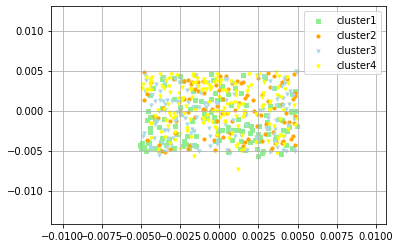

In [57]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [58]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 부정

130

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 긍정

104

In [60]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 거래소

135

In [61]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 이슈

167

In [62]:
temp_cluster_result['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [63]:
#temp_cluster_result['label'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [64]:
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 2 # 부정

In [65]:
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 1 # 긍정

In [66]:
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label']  = 12 # 거래소

In [67]:
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 5 # 이슈

In [68]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(n_clusters=4)

In [69]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [70]:
kmeans.inertia_

0.44098368287086487

In [71]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[2 2 0 0 2 3 3 3 2 3 2 2 2 2 2 2 2 2 2 0 2 3 2 2 2 1 3 2 2 2 2 2 3 2 1 3 2
 2 3 1 1 3 2 1 1 3 2 3 3 1 2 2 3 2 2 2 2 3 2 3 2 2 2 2 3 2 2 3 3 2 3 3 3 3
 1 3 1 2 2 3 2 2 3 3 3 3 3 3 1 3 3 3 3 2 3 2 3 3 3 2 3 1 3 1 3 2 3 3 3 3 1
 2 1 2 3 2 3 3 1 3 1 1 1 3 3 1 3 3 3 1 1 3 2 3 2 3 3 3 3 1 1 1 2 1 2 2 3 3
 3 3 3 3 3 1 3 1 3 3 2 3 3 1 3 3 3 1 2 3 2 2 1 3 3 3 3 2 2 2 3 1 1 3 1 3 3
 3 3 2 2 2 1 3 1 2 3 2 2 1 1 1 3 1 3 3 2 3 3 3 3 2 2 3 2 1 2 2 3 1 3 3 3 3
 3 3 3 1 1 3 2 3 3 2 1 2 1 1 3 3 3 1 1 3 3 1 2 2 2 3 1 3 1 3 3 1 3 3 1 3 3
 3 1 3 1 3 3 1 3 3 1 3 1 1 3 3 3 3 3 1 1 1 3 3 3 1 1 1 3 1 3 1 2 1 3 1 3 3
 1 1 1 3 1 3 1 1 3 3 3 1 3 1 2 3 3 1 3 1 3 1 3 2 3 3 3 3 3 3 2 1 1 2 3 3 3
 2 3 3 1 3 3 1 1 2 2 3 1 3 2 3 2 1 3 3 3 1 3 1 3 1 1 1 1 2 2 2 3 1 1 1 3 3
 1 2 1 1 3 3 3 3 3 2 3 1 3 1 3 1 3 1 3 1 3 2 3 1 1 3 1 1 3 3 1 3 3 1 1 3 3
 3 2 3 3 3 1 2 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 1 3 1 1 3 3 3 3 3 1
 1 3 1 3 1 1 3 3 3 1 3 1 3 1 2 3 3 2 3 1 1 3 3 3 1 1 3 3 3 3 3 3

In [72]:
cluster_values= list(model.wv.vocab)

In [73]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-0.44098368287086487


In [74]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [75]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.014580218


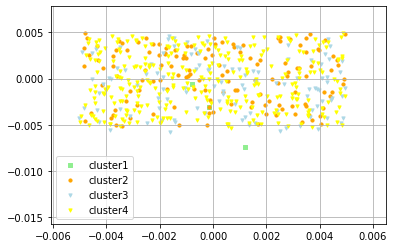

In [76]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [77]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [78]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [79]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [80]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [81]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [82]:
import scipy.spatial.distance as dist

In [83]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [84]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [85]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2,"[0.001193741918541491, -0.007345043122768402, ...",bitcoin,0,"[8.0020756e-05, -0.0036618577, -0.0022712315, ...",0.027247,0.760908,0.266339,NaN
3,"[-0.0001694792736088857, -0.003089739242568612...",cash,0,"[8.0020756e-05, -0.0036618577, -0.0022712315, ...",0.022811,0.548788,0.474023,NaN
19,"[-0.0007842003833502531, -0.000550789816770702...",bitcoincash,0,"[8.0020756e-05, -0.0036618577, -0.0022712315, ...",0.026830,0.107033,0.919797,NaN


In [86]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(20,'score') # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
49,"[0.002772044390439987, 0.00023980917467270046,...",hacker,1,"[0.00013369281, 0.0002989038, -0.0001891314, 0...",0.027082,0.005838,1.021243,NaN
143,"[-0.003112882375717163, -0.0013312194496393204...",analyze,1,"[0.00013369281, 0.0002989038, -0.0001891314, 0...",0.025934,0.003892,1.022042,NaN
360,"[-0.0037536481395363808, 0.0013743898598477244...",nnfpiz,1,"[0.00013369281, 0.0002989038, -0.0001891314, 0...",0.028030,0.005838,1.022192,NaN
103,"[0.003232603659853339, 0.00113166612572968, 9....",withdraw,1,"[0.00013369281, 0.0002989038, -0.0001891314, 0...",0.028278,0.005838,1.022440,NaN
139,"[-0.0036677392199635506, -0.003445578739047050...",jackobian,1,"[0.00013369281, 0.0002989038, -0.0001891314, 0...",0.026779,0.003892,1.022887,NaN
118,"[-0.0020348201505839825, 0.002530063036829233,...",token,1,"[0.00013369281, 0.0002989038, -0.0001891314, 0...",0.027700,0.003892,1.023808,NaN
339,"[-0.002774864435195923, -0.0012466628104448318...",boom,1,"[0.00013369281, 0.0002989038, -0.0001891314, 0...",0.027735,0.003892,1.023843,NaN
125,"[0.002951615257188678, -0.002981149824336171, ...",item,1,"[0.00013369281, 0.0002989038, -0.0001891314, 0...",0.027746,0.003892,1.023854,NaN
44,"[0.0019479612819850445, -0.002825489267706871,...",surge,1,"[0.00013369281, 0.0002989038, -0.0001891314, 0...",0.027821,0.003892,1.023929,NaN
328,"[-0.00023894032347016037, -0.00498348707333207...",lugar,1,"[0.00013369281, 0.0002989038, -0.0001891314, 0...",0.027877,0.003892,1.023984,NaN


In [87]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(20,'score')  # 부정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
30,"[-0.002849173964932561, -0.0006709682638756931...",withdrawal,2,"[0.00042115053, -0.0006949828, -0.00017833497,...",0.029011,0.128440,0.900572,NaN
46,"[0.004271283745765686, 0.0001718825806165114, ...",support,2,"[0.00042115053, -0.0006949828, -0.00017833497,...",0.029659,0.114817,0.914841,NaN
29,"[0.003922711126506329, -0.005492692347615957, ...",allow,2,"[0.00042115053, -0.0006949828, -0.00017833497,...",0.027338,0.093411,0.933927,NaN
27,"[-0.0020349081605672836, -0.003142897505313158...",reverse,2,"[0.00042115053, -0.0006949828, -0.00017833497,...",0.030283,0.095357,0.934927,NaN
28,"[-0.0006216316251084208, 0.0010506155667826533...",plan,2,"[0.00042115053, -0.0006949828, -0.00017833497,...",0.032145,0.093411,0.938734,NaN
31,"[-0.0050462353974580765, -0.004282066132873297...",january,2,"[0.00042115053, -0.0006949828, -0.00017833497,...",0.029839,0.089519,0.940320,NaN
18,"[-0.0016058356268331409, -0.005731943529099226...",news,2,"[0.00042115053, -0.0006949828, -0.00017833497,...",0.031452,0.079788,0.951664,NaN
54,"[-0.003830967703834176, -1.1134224223496858e-0...",gdax,2,"[0.00042115053, -0.0006949828, -0.00017833497,...",0.028062,0.056436,0.971626,NaN
66,"[0.004084909800440073, -0.0023869953583925962,...",update,2,"[0.00042115053, -0.0006949828, -0.00017833497,...",0.027617,0.050597,0.977020,NaN
51,"[0.004385952837765217, 0.0034772357903420925, ...",user,2,"[0.00042115053, -0.0006949828, -0.00017833497,...",0.030041,0.048651,0.981389,NaN


In [88]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
52,"[-0.003488219575956464, -0.005098741035908461,...",exodus,3,"[-0.00033144, -0.00038777996, -0.00015414416, ...",0.030442,0.035029,0.995413,NaN
64,"[-0.004764801822602749, 0.0024912599474191666,...",altcoins,3,"[-0.00033144, -0.00038777996, -0.00015414416, ...",0.024559,0.007784,1.016775,NaN
186,"[-0.0019756967667490244, 0.0010191021719947457...",tracker,3,"[-0.00033144, -0.00038777996, -0.00015414416, ...",0.029504,0.011676,1.017827,NaN
9,"[-0.0025438794400542974, 0.003558197757229209,...",launch,3,"[-0.00033144, -0.00038777996, -0.00015414416, ...",0.027608,0.009730,1.017878,NaN
108,"[-0.0020447552669793367, -0.002499367576092481...",blog,3,"[-0.00033144, -0.00038777996, -0.00015414416, ...",0.028101,0.009730,1.018370,NaN
311,"[-0.0032634553499519825, -0.003899077884852886...",falter,3,"[-0.00033144, -0.00038777996, -0.00015414416, ...",0.028409,0.009730,1.018679,NaN
428,"[-0.0015571562107652426, 0.004426102619618177,...",ifcbsf,3,"[-0.00033144, -0.00038777996, -0.00015414416, ...",0.028246,0.007784,1.020462,NaN
427,"[-0.003266117302700877, -0.0033941916190087795...",cryptotrading,3,"[-0.00033144, -0.00038777996, -0.00015414416, ...",0.028449,0.007784,1.020665,NaN
258,"[0.0006269308505579829, -0.0034812497906386852...",name,3,"[-0.00033144, -0.00038777996, -0.00015414416, ...",0.028699,0.007784,1.020915,NaN
236,"[0.0005487776361405849, -0.005171846132725477,...",year,3,"[-0.00033144, -0.00038777996, -0.00015414416, ...",0.028792,0.007784,1.021007,NaN


In [89]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) # 투자

3

In [90]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) # 이슈

141

In [91]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) # 부정

111

In [92]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) # 이슈

281

In [93]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [94]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 11 # 투자

In [95]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 5 # 이슈

In [96]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 2 # 부정

In [97]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 5 # 이슈

In [98]:
temp_cluster_result1['Silhouette'] = 0.014580218
temp_cluster_result['Silhouette'] = 0.014580218
temp_cluster_result1['result'] = 2
temp_cluster_result['result'] = 2

In [99]:
temp_cluster_result1.to_csv("../analysis/cluster/causeanalysis/BTC/before_down_BCH0_euclidean.csv")
temp_cluster_result.to_csv("../analysis/cluster/causeanalysis/BTC/before_down_BCH0_cosine")